# Визуализации в Python

### Matplotlib + Pandas

In [1]:
 # # для установки библиотек
!pip3 install seaborn
!pip3 install plotly
!pip3 install ggplot
!pip3 install matplotlib

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/ba/ebe5599acf47371393191091ae

In [2]:
# будем отображать графики прямо в jupyter'e
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

In [4]:
# увеличим дефолтный размер графиков

from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


В библиотеку pandas встроен wrapper для matplotlib

In [7]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


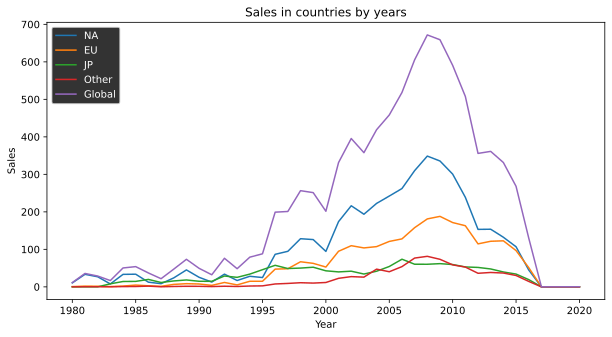

In [18]:
plt = df1.plot()
plt.set_title('Sales in countries by years')
plt.set_ylabel('Sales')
plt.set_xlabel('Year')
plt.legend([x.split('_')[0] for x in df.columns if '_Sales' in x], loc = 'upper left', labelcolor='white', facecolor='black')


Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

<Axes: xlabel='Year_of_Release'>

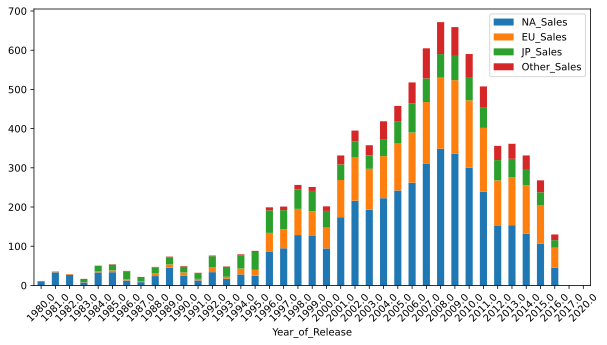

In [20]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))].plot(kind='bar', rot=45, stacked=True)

<Axes: xlabel='Year_of_Release'>

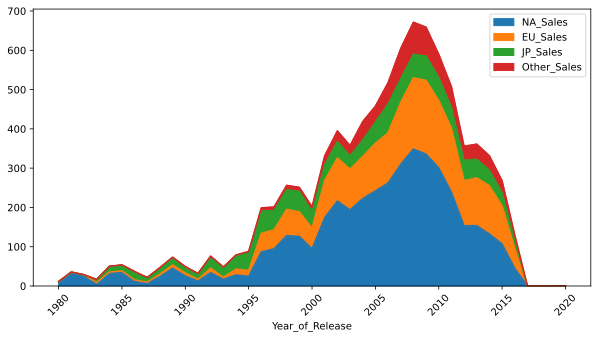

In [23]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))].plot(kind='area', rot=45)

In [24]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


In [26]:
top_developers_df.style.bar()

,Global_Sales
Developer,
Nintendo,531.710000
EA Sports,175.380000
EA Canada,142.320000
Ubisoft,132.540000
Rockstar North,119.470000
Capcom,115.710000
Ubisoft Montreal,108.310000
Treyarch,103.160000
EA Tiburon,96.120000


### Plotly